In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import shutil
import sys
import time
import pprint
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.1.0
sys.version_info(major=3, minor=6, micro=5, releaselevel='final', serial=0)
matplotlib 2.2.2
numpy 1.18.1
pandas 0.25.3
sklearn 0.19.1
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


In [2]:
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.


(20640, 8)
(20640,)


In [3]:
pprint.pprint(housing.data[0:5])
pprint.pprint(housing.target[0:5])

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])
array([4.526, 3.585, 3.521, 3.413, 3.422])


In [4]:
x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [7]:
#函数式API 功能API
# input = keras.layers.Input(shape=x_train.shape[1:])
# hidden1 = keras.layers.Dense(30,activation='relu')(input)
# hidden11=keras.layers.BatchNormalization()(hidden1)   #批归一化

# hidden2 = keras.layers.Dense(30,activation='relu')(hidden11)
# hidden21=keras.layers.BatchNormalization()(hidden2)   #批归一化

# hidden3= keras.layers.Dense(30,activation='relu')(hidden21)
# hidden31=keras.layers.BatchNormalization()(hidden3)   #批归一化


# concat = keras.layers.concatenate([input, hidden31])
# output = keras.layers.Dense(1)(concat)
# model = keras.models.Model(inputs=[input],
#                           outputs=[output])


#子类API
# class WideDeepModel(keras.models.Model):
#     def __init__(self):
#         super(WideDeepModel,self).__init__()
#         """定义函数层次"""
#         self.hidden1_layer = keras.layers.Dense(30)                 #定义一个全联接层
#         self.hidden11_layer=keras.layers.BatchNormalization()       #批归一化
#         self.hidden12_layer = keras.layers.Activation('relu')       #激活函数
#         self.hidden2_layer = keras.layers.Dense(30)
#         self.hidden21_layer=keras.layers.BatchNormalization()
#         self.hidden22_layer = keras.layers.Activation('relu')
#         self.output_layer = keras.layers.Dense(1)
        
#     def call(self,input):
#         hidden1 = self.hidden1_layer(input)
#         hidden11 = self.hidden11_layer(hidden1)
#         hidden12 = self.hidden12_layer(hidden11)
        
#         hidden2 = self.hidden2_layer(hidden12)
#         hidden21 = self.hidden21_layer(hidden2)
#         hidden22 = self.hidden22_layer(hidden21)
#         concat = keras.layers.concatenate([input,hidden22])
#         output = self.output_layer(hidden22)
#         return output
# #model = WideDeepModel()

# model = keras.models.Sequential([
#     WideDeepModel(),
# ])

#多输入
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30,activation='relu')(input_deep)
hidden11=keras.layers.BatchNormalization()(hidden1)   #批归一化

hidden2 = keras.layers.Dense(30,activation='relu')(hidden11)
hidden21=keras.layers.BatchNormalization()(hidden2)   #批归一化

hidden3= keras.layers.Dense(30,activation='relu')(hidden21)
hidden31=keras.layers.BatchNormalization()(hidden3)   #批归一化


concat = keras.layers.concatenate([input_wide, hidden31])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs=[input_wide,input_deep],outputs=[output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           210         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 30)           120         dense[0][0]                      
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         batch_normalization[0][0]        
______________________________________________________________________________________________

In [10]:
x_train_scaled_wide = x_train_scaled[:,:5]
x_train_scaled_deep = x_train_scaled[:,2:]
x_valid_scaled_wide = x_valid_scaled[:,:5]
x_valid_scaled_deep = x_valid_scaled[:,2:]
x_test_scaled_wide = x_test_scaled[:,:5]
x_test_scaled_deep = x_test_scaled[:,2:]

In [11]:
model.compile(loss="mean_squared_error",optimizer="sgd")#,metrics=["accuracy"])

#重新建立文件夹
logdir = './wide_deep_subclass'
if os.path.exists(logdir):
    shutil.rmtree(logdir)
os.mkdir(logdir)    
output_model_file = os.path.join(logdir,
                                "house_price_model.h5")

#Tensorboard, earlystopping, ModelCheckpoint
callbacks = [
#    keras.callbacks.TensorBoard(logdir),
#    keras.callbacks.ModelCheckpoint(output_model_file,
#                                   save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2) #连续5次损失函数和上一次差距小于1e-3即可停止训练    
]


his = model.fit([x_train_scaled_wide,x_train_scaled_deep],
                y_train,
                epochs =100, 
         validation_data=([x_valid_scaled_wide,x_valid_scaled_deep],y_valid),
                 callbacks = callbacks)  #epochs 训练次数
#终端命令 tensorboard --logdir=callbacks 

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 104us/sample - loss: 0.7810 - val_loss: 0.5768
Epoch 2/100
11610/11610 [==============================] - 1s 48us/sample - loss: 0.4367 - val_loss: 0.4445
Epoch 3/100
11610/11610 [==============================] - 1s 47us/sample - loss: 0.4126 - val_loss: 0.4447
Epoch 4/100
11610/11610 [==============================] - 1s 47us/sample - loss: 0.3937 - val_loss: 0.4165
Epoch 5/100
11610/11610 [==============================] - 1s 48us/sample - loss: 0.3877 - val_loss: 0.4437
Epoch 6/100
11610/11610 [==============================] - 1s 48us/sample - loss: 0.3828 - val_loss: 0.4280
Epoch 7/100
11610/11610 [==============================] - 1s 48us/sample - loss: 0.3797 - val_loss: 0.3798
Epoch 8/100
11610/11610 [==============================] - 1s 48us/sample - loss: 0.3784 - val_loss: 0.3807
Epoch 9/100
11610/11610 [==============================] - 1s 48us/sample - loss: 0.37

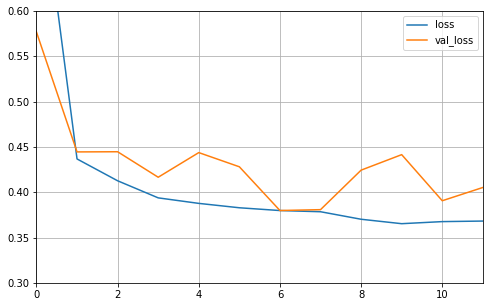

In [12]:
 def plot_learning_curves(his):
        pd.DataFrame(his.history).plot(figsize=(8,5))
        plt.grid(True)
        plt.gca().set_ylim(0.3,0.6)
        plt.show()
        
plot_learning_curves(his)

In [13]:
model.evaluate([x_test_scaled_wide,x_test_scaled_deep], y_test)

5160/5160 [==============================] - 0s 26us/sample - loss: 0.4999


0.4999425488849019